# DCGAN - MNIST

In this notebook, we will create a GAN using the MNIST dataset following the implementation of the paper a Deep Convolutional GAN (DCGAN) https://arxiv.org/pdf/1511.06434v1.pdf, a very successful and influential GAN model developed in 2015.

The common GAN model is composed of two sub-models: a generator (G) which generates examples from noise vectors (z) and a discriminator (D) which classify whether generated examples are real or fake. The generator and the discriminator are trained jointly, where the generator try to fool the discriminator. Mathematically, that means for the generator $D(G(z))$ should be close to 1 if the generator succeed to fool the discriminator. On the contrary, for the discriminator, $D(G(z))$ should be  close to 0, and $D(G(x))$ should be close to 1 (real image). So, we can see that the generator and the discriminator are competing and they are playing a minmax game :

$\min _{G} \max _{D} V(D, G)=\mathbb{E}_{x \sim p_{\text {data }}(x)}[\log D(x)]+\mathbb{E}_{z \sim p_{z}(z)}[\log (1-D(G(z)))]$

The Architecture guidelines for stable Deep Convolutional GANs : 
- Replace any pooling layers with strided convolutions (discriminator) and fractional-stridedconvolutions (generator)
- Use batchnorm in both the generator and the discriminator.
- Remove fully connected hidden layers for deeper architectures.
- Use ReLU activation in generator for all layers except for the output, which uses Tanh.
- Use LeakyReLU activation in the discriminator for all layers.

The code of the models into "models/DCGAN.py"


![image](imgs/dcgan_generator.png)




In [1]:
import torch
from torch import nn
from tqdm import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from DCGAN import DCGAN_Generator, DCGAN_Discriminator
import random
import numpy as np
import os

In [2]:
def generate_noise_vector(n_samples, z_dim, device):
    return torch.randn(n_samples, z_dim, device=device)

In [3]:
SEED = 42

def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
seed_everything(SEED)

In [4]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5) # take only num_image from the batch
    plt.imshow(image_grid.permute(1, 2, 0).squeeze()) # to put the right order regarding the dimension
    plt.show()

## Training Parameters
  *   criterion: the loss function => BCEWithLogitsLoss
  *   n_epochs: the number of times you iterate through the mnist dataset when training
  *   z_dim: the dimension of the noise vector
  *   display_step: how often to display/visualize the images
  *   batch_size: the number of images per forward/backward pass
  *   lr: the learning rate
  *   device: the device type
  *   gen_optimizer, disc_optimizer : optimizer used to correct the generator and discriminator => Adam
  
  
We need during the training to detach the fake image generated when we do a forward with the discriminator !

In [5]:
z_dim = 64
lr = 0.0005
device = 'cuda'
gen = DCGAN_Generator(z_dim=z_dim, im_chan=1, hidden_dim=32, kernel_sizes=[3, 4, 3, 4 ], strides=[2, 1, 2, 2]).to(device)
gen_optimizer = torch.optim.Adam(gen.parameters(), lr=lr )

disc = DCGAN_Discriminator(input_chan=1, hidden_dim=16, kernel_sizes=[4,4,4], strides=[2,2,2]).to(device)
disc_optimizer = torch.optim.Adam(disc.parameters(), lr=lr )


In [6]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 100
display_step = 500
batch_size = 128




transform = transforms.Compose([
    transforms.ToTensor(),])

dataloader = DataLoader(
    MNIST('.', download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [7]:
for i in tqdm(range(9)):
    pass

100%|██████████| 9/9 [00:00<00:00, 39610.43it/s]


Loss Generator: 1.7226 / Loss Discriminator 0.3917: 100%|██████████| 469/469 [00:14<00:00, 31.36it/s]
Loss Generator: 2.6689 / Loss Discriminator 0.1259:   6%|▌         | 28/469 [00:01<00:15, 28.76it/s]

Epochs : 1 , steps : 500


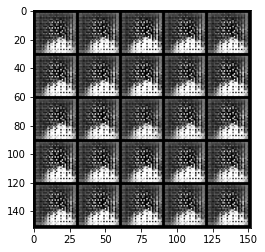

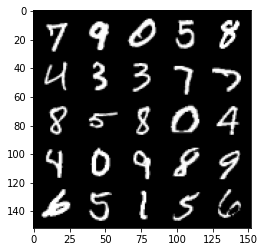

Loss Generator: 3.467 / Loss Discriminator 0.0739: 100%|██████████| 469/469 [00:14<00:00, 31.74it/s]
Loss Generator: 4.0351 / Loss Discriminator 0.0422:  13%|█▎        | 60/469 [00:01<00:11, 35.46it/s]

Epochs : 2 , steps : 1000


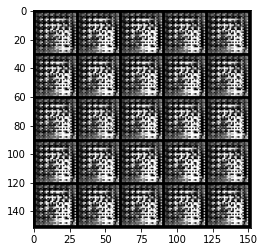

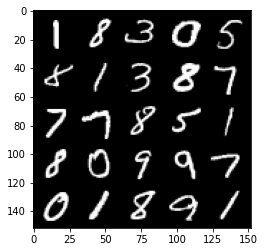

Loss Generator: 4.5708 / Loss Discriminator 0.0252: 100%|██████████| 469/469 [00:14<00:00, 32.77it/s]
Loss Generator: 4.9268 / Loss Discriminator 0.0172:  20%|█▉        | 92/469 [00:02<00:10, 34.38it/s]

Epochs : 3 , steps : 1500


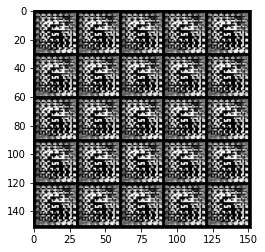

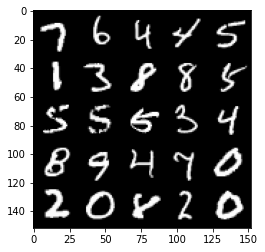

Loss Generator: 4.8435 / Loss Discriminator 0.0202: 100%|██████████| 469/469 [00:16<00:00, 28.80it/s]
Loss Generator: 5.092 / Loss Discriminator 0.0138:  26%|██▌       | 120/469 [00:03<00:10, 34.06it/s]

Epochs : 4 , steps : 2000


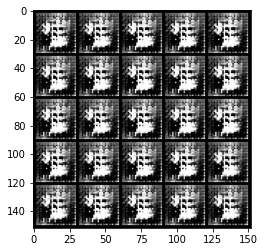

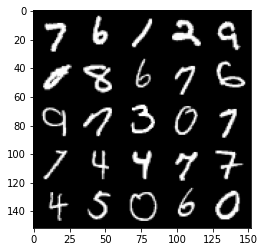

Loss Generator: 4.8729 / Loss Discriminator 0.0214: 100%|██████████| 469/469 [00:14<00:00, 32.58it/s]
Loss Generator: 4.9239 / Loss Discriminator 0.0264:  33%|███▎      | 154/469 [00:04<00:09, 33.38it/s]

Epochs : 5 , steps : 2500


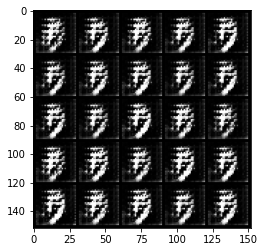

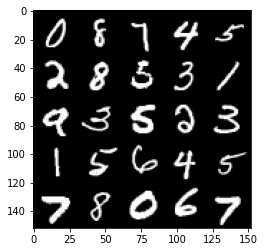

Loss Generator: 5.2362 / Loss Discriminator 0.0216: 100%|██████████| 469/469 [00:14<00:00, 31.70it/s]
Loss Generator: 5.7229 / Loss Discriminator 0.0084:  39%|███▉      | 183/469 [00:05<00:08, 33.83it/s]

Epochs : 6 , steps : 3000


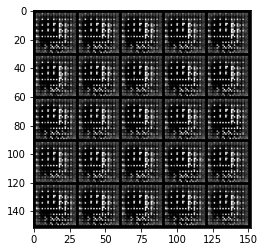

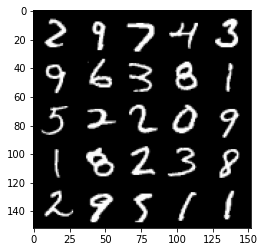

Loss Generator: 5.8236 / Loss Discriminator 0.0076: 100%|██████████| 469/469 [00:14<00:00, 32.30it/s]
Loss Generator: 6.0541 / Loss Discriminator 0.0072:  45%|████▌     | 213/469 [00:06<00:07, 34.46it/s]

Epochs : 7 , steps : 3500


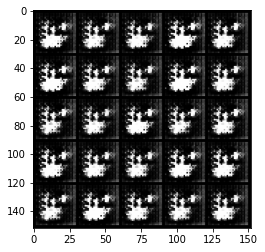

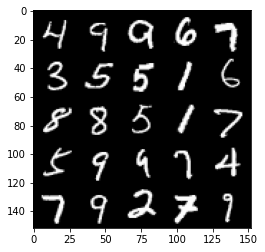

Loss Generator: 5.6709 / Loss Discriminator 0.0152: 100%|██████████| 469/469 [00:14<00:00, 32.90it/s]
Loss Generator: 5.5255 / Loss Discriminator 0.0295:  52%|█████▏    | 244/469 [00:07<00:06, 34.05it/s]

Epochs : 8 , steps : 4000


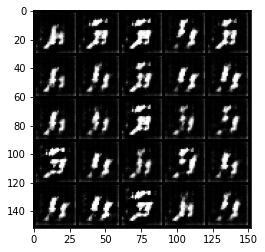

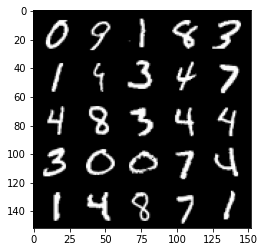

Loss Generator: 5.3744 / Loss Discriminator 0.0403: 100%|██████████| 469/469 [00:14<00:00, 32.90it/s]
Loss Generator: 4.5245 / Loss Discriminator 0.0575:  59%|█████▉    | 277/469 [00:08<00:05, 33.68it/s]

Epochs : 9 , steps : 4500


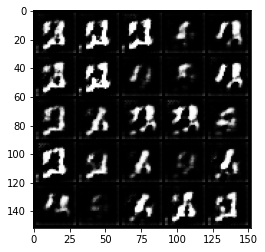

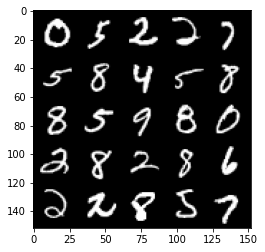

Loss Generator: 4.4473 / Loss Discriminator 0.0676: 100%|██████████| 469/469 [00:14<00:00, 32.85it/s]
Loss Generator: 3.9544 / Loss Discriminator 0.0873:  65%|██████▌   | 307/469 [00:09<00:04, 34.30it/s]

Epochs : 10 , steps : 5000


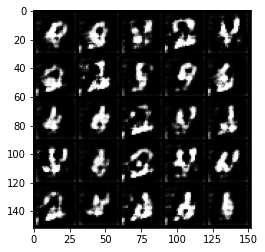

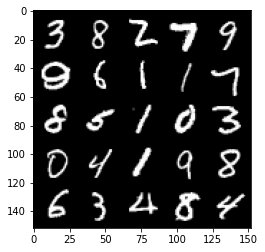

Loss Generator: 3.8988 / Loss Discriminator 0.0999: 100%|██████████| 469/469 [00:14<00:00, 32.80it/s]
Loss Generator: 3.7404 / Loss Discriminator 0.1253:  72%|███████▏  | 337/469 [00:10<00:04, 28.96it/s]

Epochs : 11 , steps : 5500


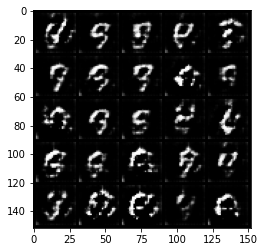

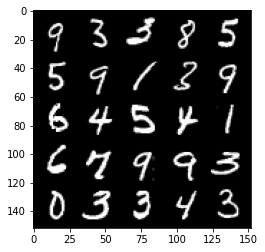

Loss Generator: 3.7401 / Loss Discriminator 0.1275: 100%|██████████| 469/469 [00:14<00:00, 32.61it/s]
Loss Generator: 3.3693 / Loss Discriminator 0.1772:  78%|███████▊  | 368/469 [00:10<00:02, 34.68it/s]

Epochs : 12 , steps : 6000


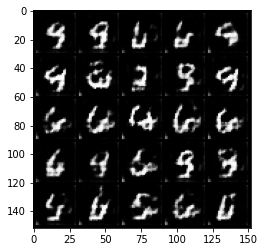

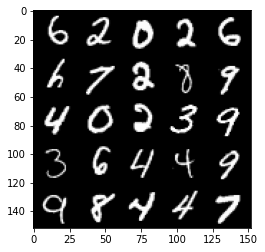

Loss Generator: 3.431 / Loss Discriminator 0.173: 100%|██████████| 469/469 [00:14<00:00, 33.38it/s]
Loss Generator: 3.0065 / Loss Discriminator 0.2027:  85%|████████▌ | 399/469 [00:11<00:02, 34.16it/s]

Epochs : 13 , steps : 6500


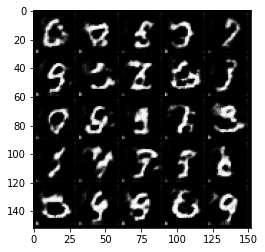

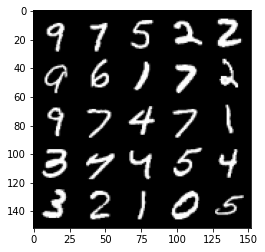

Loss Generator: 2.9852 / Loss Discriminator 0.2022: 100%|██████████| 469/469 [00:14<00:00, 33.31it/s]
Loss Generator: 2.6302 / Loss Discriminator 0.2702:  92%|█████████▏| 432/469 [00:13<00:01, 34.56it/s]

Epochs : 14 , steps : 7000


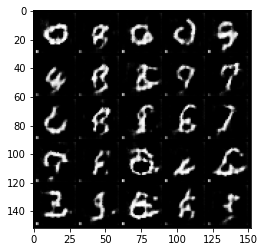

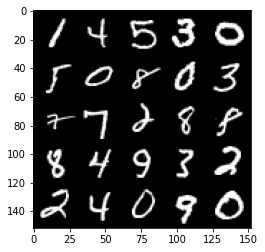

Loss Generator: 2.5944 / Loss Discriminator 0.2795: 100%|██████████| 469/469 [00:14<00:00, 32.18it/s]
Loss Generator: 2.206 / Loss Discriminator 0.3488:  99%|█████████▉| 464/469 [00:14<00:00, 32.52it/s]

Epochs : 15 , steps : 7500


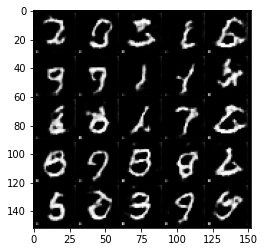

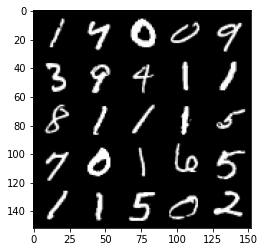

Loss Generator: 2.2067 / Loss Discriminator 0.3475: 100%|██████████| 469/469 [00:14<00:00, 32.06it/s]
Loss Generator: 2.0653 / Loss Discriminator 0.4092: 100%|██████████| 469/469 [00:13<00:00, 33.58it/s]
Loss Generator: 2.3131 / Loss Discriminator 0.3112:   5%|▌         | 24/469 [00:00<00:12, 34.68it/s]

Epochs : 17 , steps : 8000


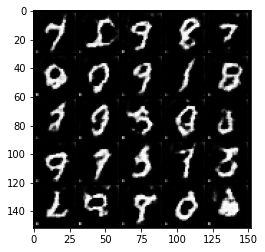

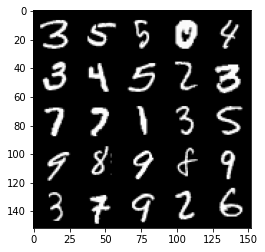

Loss Generator: 2.1092 / Loss Discriminator 0.4296: 100%|██████████| 469/469 [00:13<00:00, 33.53it/s]
Loss Generator: 2.1491 / Loss Discriminator 0.3775:  12%|█▏        | 56/469 [00:01<00:12, 34.36it/s]

Epochs : 18 , steps : 8500


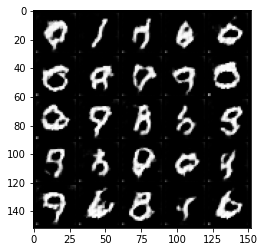

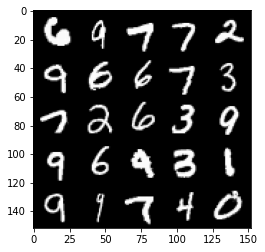

Loss Generator: 1.8185 / Loss Discriminator 0.4503: 100%|██████████| 469/469 [00:14<00:00, 32.78it/s]
Loss Generator: 1.8253 / Loss Discriminator 0.429:  19%|█▉        | 88/469 [00:02<00:11, 33.86it/s]

Epochs : 19 , steps : 9000


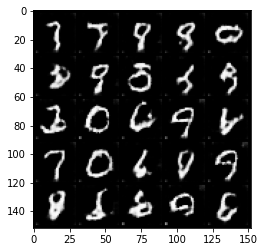

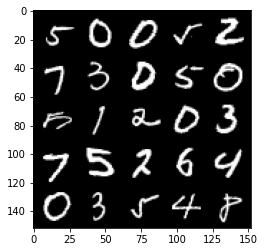

Loss Generator: 1.6905 / Loss Discriminator 0.4805: 100%|██████████| 469/469 [00:14<00:00, 32.35it/s]
Loss Generator: 1.4484 / Loss Discriminator 0.5399:  25%|██▍       | 116/469 [00:03<00:10, 34.65it/s]

Epochs : 20 , steps : 9500


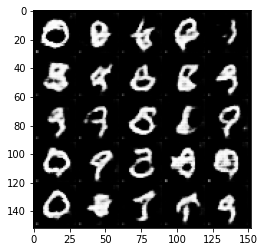

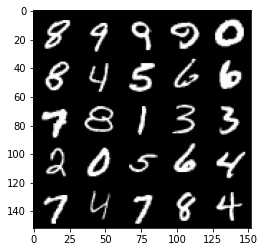

Loss Generator: 1.557 / Loss Discriminator 0.5293: 100%|██████████| 469/469 [00:14<00:00, 32.96it/s]
Loss Generator: 1.6627 / Loss Discriminator 0.5152:  32%|███▏      | 148/469 [00:04<00:09, 33.09it/s]

Epochs : 21 , steps : 10000


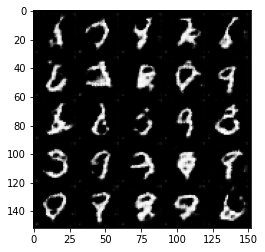

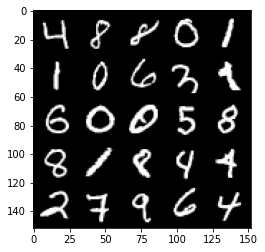

Loss Generator: 1.6808 / Loss Discriminator 0.5429: 100%|██████████| 469/469 [00:14<00:00, 32.99it/s]
Loss Generator: 1.6005 / Loss Discriminator 0.5334:  38%|███▊      | 179/469 [00:05<00:08, 33.29it/s]

Epochs : 22 , steps : 10500


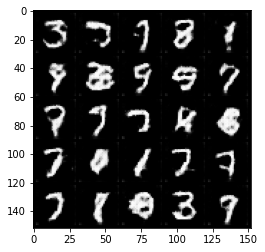

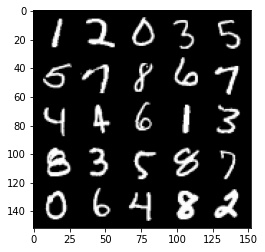

Loss Generator: 1.5464 / Loss Discriminator 0.5448: 100%|██████████| 469/469 [00:14<00:00, 31.57it/s]
Loss Generator: 1.4447 / Loss Discriminator 0.5495:  45%|████▍     | 210/469 [00:06<00:07, 33.48it/s]

Epochs : 23 , steps : 11000


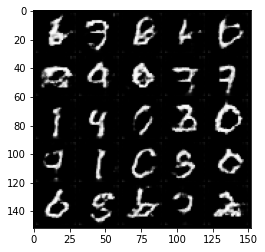

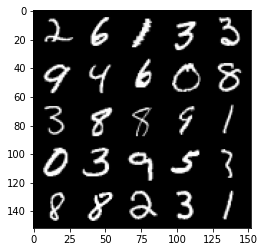

Loss Generator: 1.4307 / Loss Discriminator 0.5588: 100%|██████████| 469/469 [00:14<00:00, 32.92it/s]
Loss Generator: 1.487 / Loss Discriminator 0.5636:  52%|█████▏    | 242/469 [00:07<00:06, 34.50it/s]

Epochs : 24 , steps : 11500


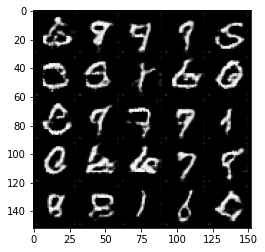

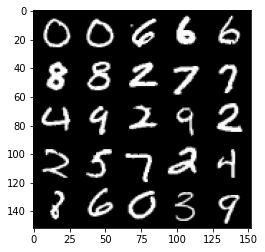

Loss Generator: 1.4552 / Loss Discriminator 0.566: 100%|██████████| 469/469 [00:14<00:00, 32.61it/s]
Loss Generator: 1.2148 / Loss Discriminator 0.5922:  58%|█████▊    | 274/469 [00:08<00:06, 30.99it/s]

Epochs : 25 , steps : 12000


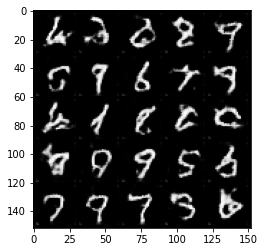

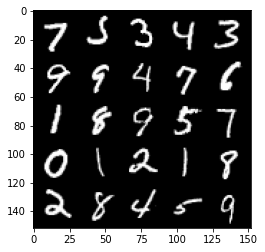

Loss Generator: 1.2738 / Loss Discriminator 0.5795: 100%|██████████| 469/469 [00:14<00:00, 33.13it/s]
Loss Generator: 1.3534 / Loss Discriminator 0.5837:  65%|██████▍   | 304/469 [00:09<00:05, 32.74it/s]

Epochs : 26 , steps : 12500


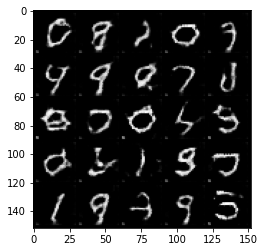

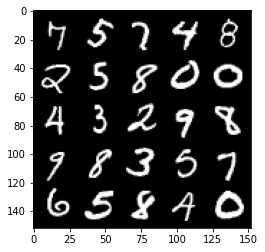

Loss Generator: 1.293 / Loss Discriminator 0.5937: 100%|██████████| 469/469 [00:14<00:00, 32.63it/s]
Loss Generator: 1.311 / Loss Discriminator 0.5985:  72%|███████▏  | 336/469 [00:10<00:04, 30.74it/s]

Epochs : 27 , steps : 13000


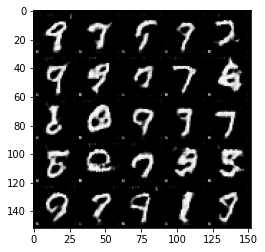

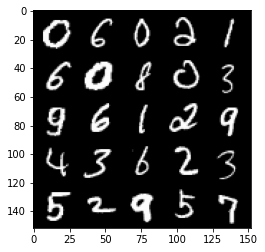

Loss Generator: 1.2782 / Loss Discriminator 0.6029: 100%|██████████| 469/469 [00:14<00:00, 32.47it/s]
Loss Generator: 1.2114 / Loss Discriminator 0.6332:  78%|███████▊  | 365/469 [00:11<00:03, 34.56it/s]

Epochs : 28 , steps : 13500


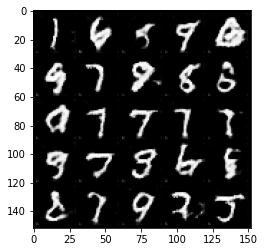

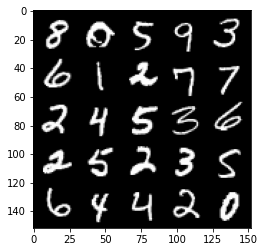

Loss Generator: 1.2105 / Loss Discriminator 0.6344: 100%|██████████| 469/469 [00:14<00:00, 32.60it/s]
Loss Generator: 1.0611 / Loss Discriminator 0.6356:  84%|████████▍ | 396/469 [00:12<00:02, 35.13it/s]

Epochs : 29 , steps : 14000


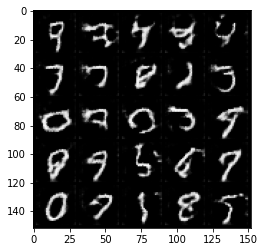

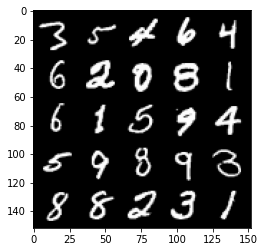

Loss Generator: 1.0911 / Loss Discriminator 0.6324: 100%|██████████| 469/469 [00:14<00:00, 32.09it/s]
Loss Generator: 1.2391 / Loss Discriminator 0.6101:  91%|█████████▏| 428/469 [00:12<00:01, 34.50it/s]

Epochs : 30 , steps : 14500


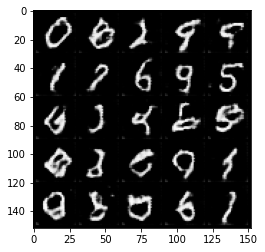

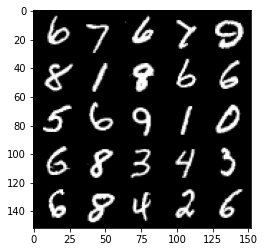

Loss Generator: 1.2234 / Loss Discriminator 0.6125: 100%|██████████| 469/469 [00:14<00:00, 33.10it/s]
Loss Generator: 1.12 / Loss Discriminator 0.6153:  98%|█████████▊| 460/469 [00:13<00:00, 33.81it/s]

Epochs : 31 , steps : 15000


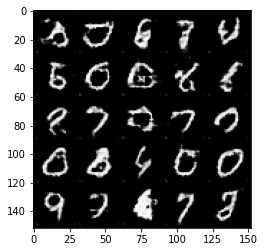

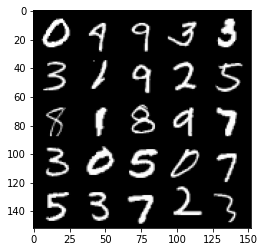

Loss Generator: 1.1186 / Loss Discriminator 0.6158: 100%|██████████| 469/469 [00:13<00:00, 33.71it/s]
Loss Generator: 1.1535 / Loss Discriminator 0.6305: 100%|██████████| 469/469 [00:13<00:00, 33.73it/s]
Loss Generator: 1.1423 / Loss Discriminator 0.5624:   4%|▍         | 20/469 [00:00<00:12, 35.52it/s]

Epochs : 33 , steps : 15500


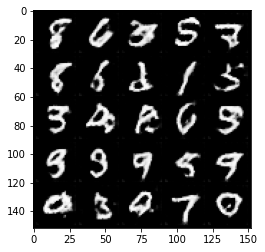

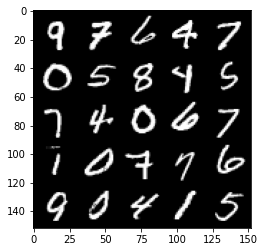

Loss Generator: 1.1037 / Loss Discriminator 0.6283: 100%|██████████| 469/469 [00:14<00:00, 32.87it/s]
Loss Generator: 1.0854 / Loss Discriminator 0.622:  11%|█         | 52/469 [00:01<00:12, 32.15it/s]

Epochs : 34 , steps : 16000


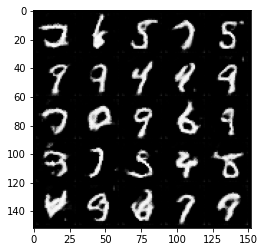

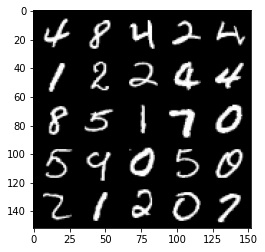

Loss Generator: 1.0443 / Loss Discriminator 0.6444: 100%|██████████| 469/469 [00:14<00:00, 31.63it/s]
Loss Generator: 1.0113 / Loss Discriminator 0.673:  18%|█▊        | 84/469 [00:02<00:10, 35.42it/s]

Epochs : 35 , steps : 16500


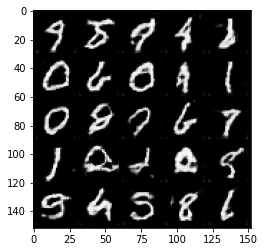

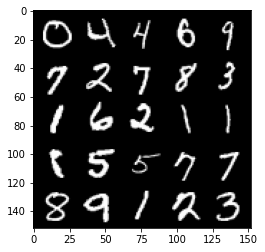

Loss Generator: 1.0148 / Loss Discriminator 0.6681: 100%|██████████| 469/469 [00:14<00:00, 33.14it/s]
Loss Generator: 1.1178 / Loss Discriminator 0.6282:  25%|██▍       | 115/469 [00:03<00:10, 33.60it/s]

Epochs : 36 , steps : 17000


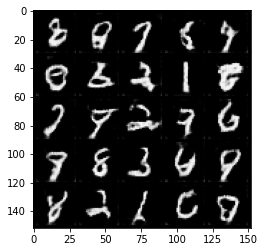

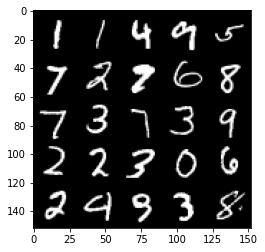

Loss Generator: 1.0853 / Loss Discriminator 0.6484: 100%|██████████| 469/469 [00:14<00:00, 32.31it/s]
Loss Generator: 1.2559 / Loss Discriminator 0.5717:  31%|███       | 144/469 [00:04<00:09, 34.34it/s]

Epochs : 37 , steps : 17500


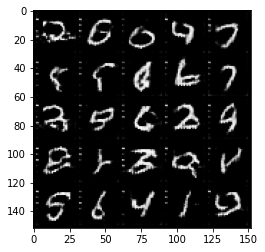

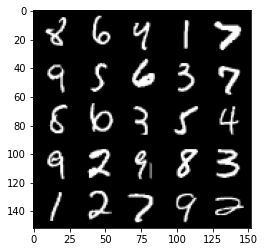

Loss Generator: 1.2343 / Loss Discriminator 0.6142: 100%|██████████| 469/469 [00:14<00:00, 32.61it/s]
Loss Generator: 1.1556 / Loss Discriminator 0.606:  37%|███▋      | 174/469 [00:05<00:08, 33.86it/s]

Epochs : 38 , steps : 18000


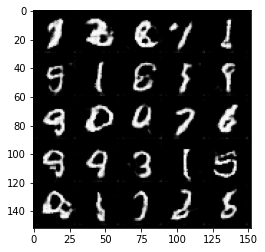

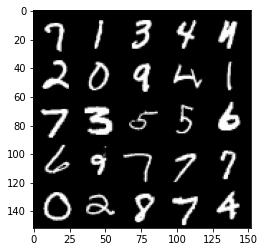

Loss Generator: 1.0709 / Loss Discriminator 0.6382: 100%|██████████| 469/469 [00:14<00:00, 31.35it/s]
Loss Generator: 1.0072 / Loss Discriminator 0.675:  44%|████▍     | 208/469 [00:06<00:07, 34.40it/s]

Epochs : 39 , steps : 18500


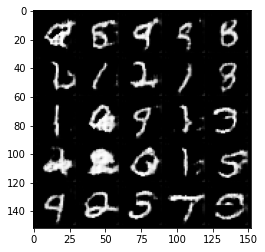

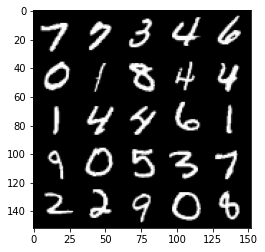

Loss Generator: 1.0004 / Loss Discriminator 0.6739: 100%|██████████| 469/469 [00:14<00:00, 31.29it/s]
Loss Generator: 0.9139 / Loss Discriminator 0.6895:  51%|█████     | 237/469 [00:07<00:07, 33.11it/s]

Epochs : 40 , steps : 19000


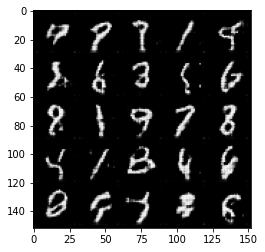

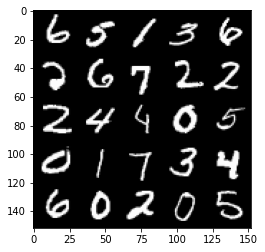

Loss Generator: 0.9648 / Loss Discriminator 0.6799: 100%|██████████| 469/469 [00:14<00:00, 32.94it/s]
Loss Generator: 0.9793 / Loss Discriminator 0.657:  57%|█████▋    | 267/469 [00:07<00:05, 35.36it/s]

Epochs : 41 , steps : 19500


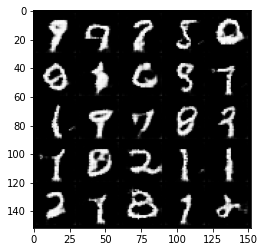

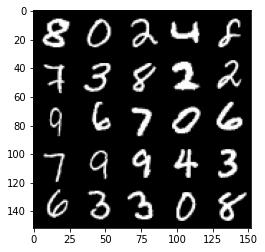

Loss Generator: 0.9591 / Loss Discriminator 0.6661: 100%|██████████| 469/469 [00:13<00:00, 33.76it/s]
Loss Generator: 0.8887 / Loss Discriminator 0.6688:  64%|██████▍   | 300/469 [00:08<00:04, 35.22it/s]

Epochs : 42 , steps : 20000


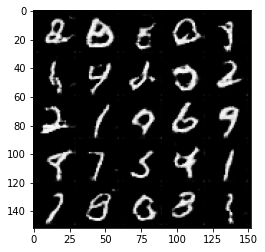

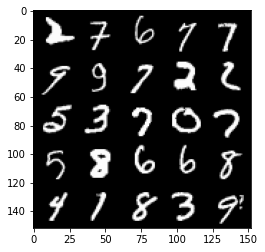

Loss Generator: 0.8842 / Loss Discriminator 0.6698: 100%|██████████| 469/469 [00:14<00:00, 33.49it/s]
Loss Generator: 0.9172 / Loss Discriminator 0.6786:  71%|███████   | 332/469 [00:09<00:04, 33.24it/s]

Epochs : 43 , steps : 20500


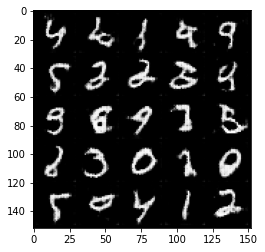

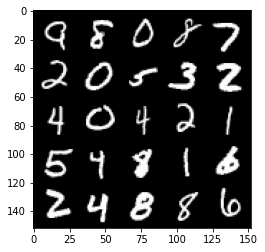

Loss Generator: 0.9275 / Loss Discriminator 0.6752: 100%|██████████| 469/469 [00:14<00:00, 33.16it/s]
Loss Generator: 0.9234 / Loss Discriminator 0.6672:  77%|███████▋  | 362/469 [00:10<00:03, 34.62it/s]

Epochs : 44 , steps : 21000


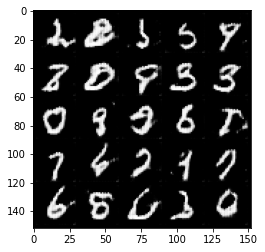

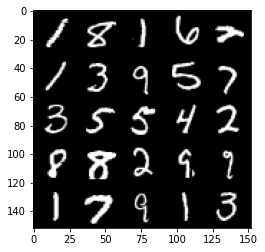

Loss Generator: 0.9181 / Loss Discriminator 0.6717: 100%|██████████| 469/469 [00:14<00:00, 33.22it/s]
Loss Generator: 0.9172 / Loss Discriminator 0.6803:  84%|████████▎ | 392/469 [00:12<00:02, 30.12it/s]

Epochs : 45 , steps : 21500


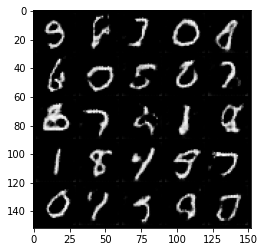

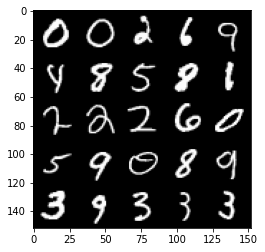

Loss Generator: 0.9127 / Loss Discriminator 0.6813: 100%|██████████| 469/469 [00:14<00:00, 32.40it/s]
Loss Generator: 0.8936 / Loss Discriminator 0.6759:  90%|█████████ | 423/469 [00:12<00:01, 35.10it/s]

Epochs : 46 , steps : 22000


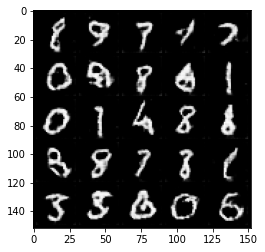

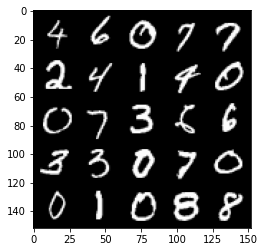

Loss Generator: 0.8932 / Loss Discriminator 0.6745: 100%|██████████| 469/469 [00:14<00:00, 32.53it/s]
Loss Generator: 0.8712 / Loss Discriminator 0.6711:  97%|█████████▋| 456/469 [00:13<00:00, 33.21it/s]

Epochs : 47 , steps : 22500


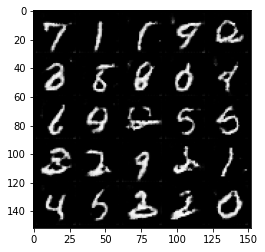

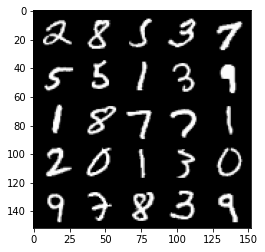

Loss Generator: 0.8727 / Loss Discriminator 0.6707: 100%|██████████| 469/469 [00:14<00:00, 33.37it/s]
Loss Generator: 0.9225 / Loss Discriminator 0.6653: 100%|██████████| 469/469 [00:13<00:00, 34.00it/s]
Loss Generator: 0.78 / Loss Discriminator 0.7897:   3%|▎         | 16/469 [00:00<00:13, 33.30it/s]

Epochs : 49 , steps : 23000


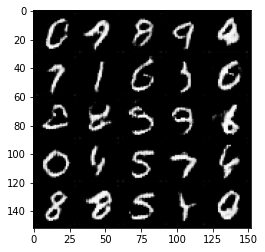

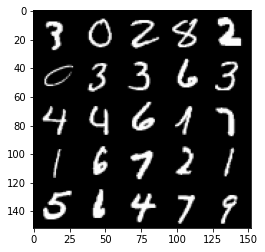

Loss Generator: 0.9823 / Loss Discriminator 0.6518: 100%|██████████| 469/469 [00:14<00:00, 33.35it/s]
Loss Generator: 0.8518 / Loss Discriminator 0.7283:  10%|█         | 48/469 [00:01<00:12, 33.69it/s]

Epochs : 50 , steps : 23500


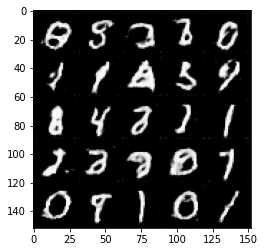

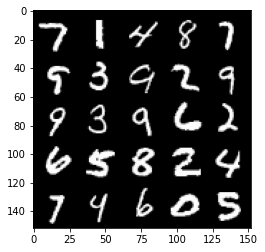

Loss Generator: 0.8645 / Loss Discriminator 0.6804: 100%|██████████| 469/469 [00:14<00:00, 32.76it/s]
Loss Generator: 0.8428 / Loss Discriminator 0.6654:  17%|█▋        | 80/469 [00:02<00:11, 34.99it/s]

Epochs : 51 , steps : 24000


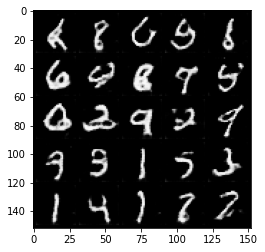

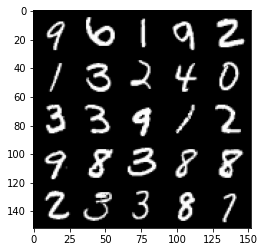

Loss Generator: 0.8492 / Loss Discriminator 0.6693: 100%|██████████| 469/469 [00:14<00:00, 33.46it/s]
Loss Generator: 0.8843 / Loss Discriminator 0.6916:  23%|██▎       | 108/469 [00:03<00:10, 35.42it/s]

Epochs : 52 , steps : 24500


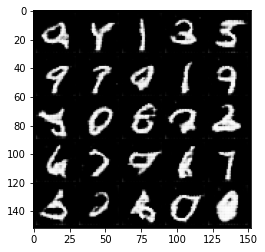

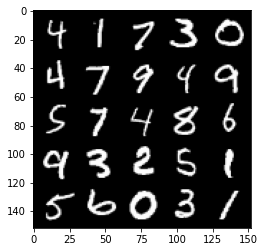

Loss Generator: 0.9052 / Loss Discriminator 0.6748: 100%|██████████| 469/469 [00:13<00:00, 33.50it/s]
Loss Generator: 0.9414 / Loss Discriminator 0.6526:  30%|██▉       | 140/469 [00:04<00:09, 35.47it/s]

Epochs : 53 , steps : 25000


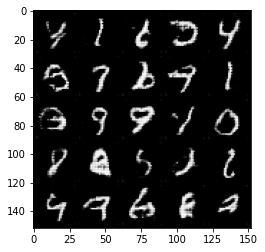

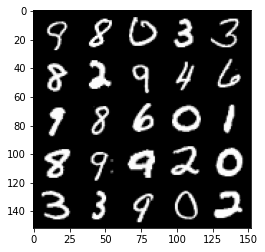

Loss Generator: 0.9284 / Loss Discriminator 0.6499: 100%|██████████| 469/469 [00:14<00:00, 32.48it/s]
Loss Generator: 0.8467 / Loss Discriminator 0.6928:  37%|███▋      | 172/469 [00:04<00:08, 35.35it/s]

Epochs : 54 , steps : 25500


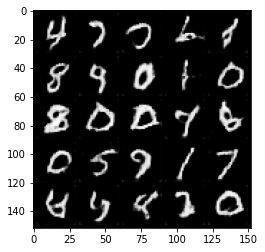

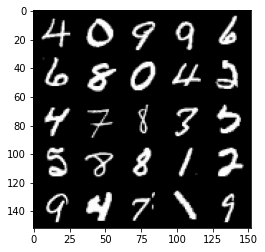

Loss Generator: 0.8227 / Loss Discriminator 0.6885: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]
Loss Generator: 0.795 / Loss Discriminator 0.6843:  43%|████▎     | 203/469 [00:05<00:07, 34.65it/s]

Epochs : 55 , steps : 26000


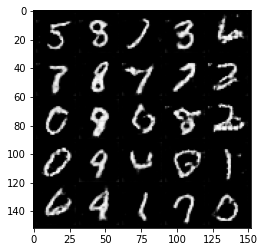

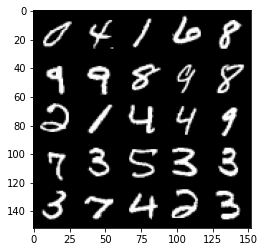

Loss Generator: 0.8048 / Loss Discriminator 0.6809: 100%|██████████| 469/469 [00:13<00:00, 33.64it/s]
Loss Generator: 0.8304 / Loss Discriminator 0.67:  49%|████▉     | 232/469 [00:07<00:07, 31.77it/s]

Epochs : 56 , steps : 26500


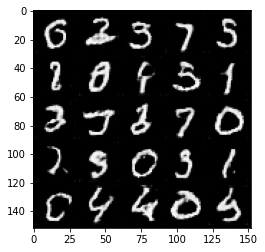

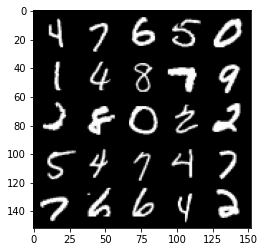

Loss Generator: 0.8163 / Loss Discriminator 0.6729: 100%|██████████| 469/469 [00:14<00:00, 32.05it/s]
Loss Generator: 0.8098 / Loss Discriminator 0.6791:  57%|█████▋    | 265/469 [00:07<00:05, 34.11it/s]

Epochs : 57 , steps : 27000


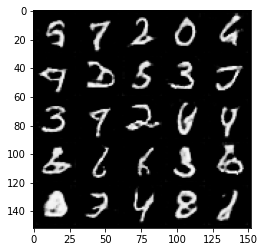

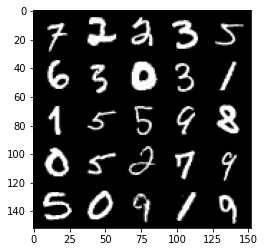

Loss Generator: 0.8164 / Loss Discriminator 0.6802: 100%|██████████| 469/469 [00:14<00:00, 32.37it/s]
Loss Generator: 0.9121 / Loss Discriminator 0.6718:  63%|██████▎   | 295/469 [00:09<00:05, 31.90it/s]

Epochs : 58 , steps : 27500


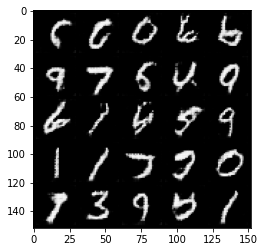

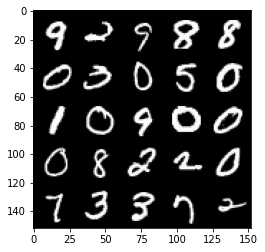

Loss Generator: 0.8975 / Loss Discriminator 0.665: 100%|██████████| 469/469 [00:14<00:00, 32.32it/s]
Loss Generator: 1.1028 / Loss Discriminator 0.6227:  70%|██████▉   | 327/469 [00:10<00:04, 31.75it/s]

Epochs : 59 , steps : 28000


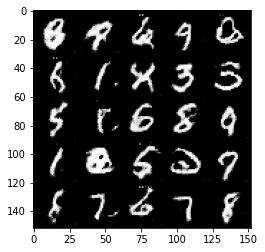

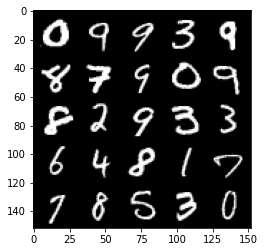

Loss Generator: 1.0429 / Loss Discriminator 0.641: 100%|██████████| 469/469 [00:14<00:00, 31.98it/s]
Loss Generator: 0.8472 / Loss Discriminator 0.6694:  77%|███████▋  | 359/469 [00:10<00:03, 30.64it/s]

Epochs : 60 , steps : 28500


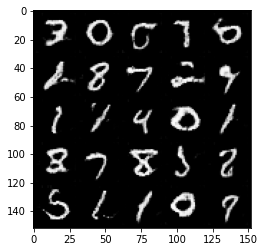

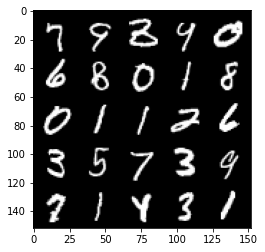

Loss Generator: 0.8391 / Loss Discriminator 0.6734: 100%|██████████| 469/469 [00:14<00:00, 32.41it/s]
Loss Generator: 0.8453 / Loss Discriminator 0.684:  83%|████████▎ | 388/469 [00:11<00:02, 34.13it/s]

Epochs : 61 , steps : 29000


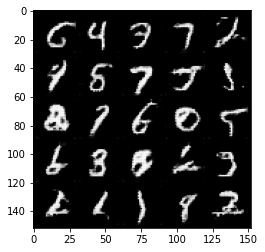

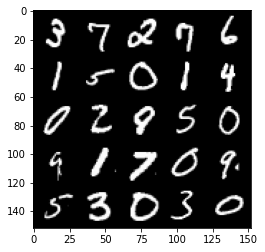

Loss Generator: 0.8472 / Loss Discriminator 0.6793: 100%|██████████| 469/469 [00:14<00:00, 33.14it/s]
Loss Generator: 0.8391 / Loss Discriminator 0.6701:  89%|████████▉ | 419/469 [00:12<00:01, 33.52it/s]

Epochs : 62 , steps : 29500


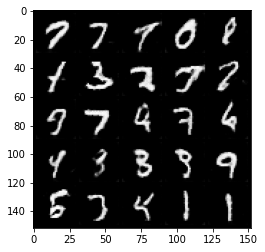

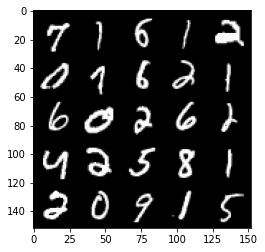

Loss Generator: 0.8294 / Loss Discriminator 0.6762: 100%|██████████| 469/469 [00:14<00:00, 32.11it/s]
Loss Generator: 0.7945 / Loss Discriminator 0.6802:  96%|█████████▌| 451/469 [00:13<00:00, 33.07it/s]

Epochs : 63 , steps : 30000


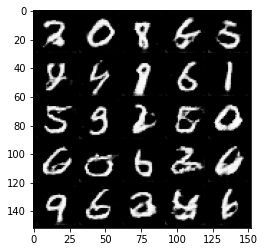

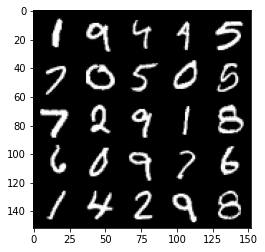

Loss Generator: 0.7959 / Loss Discriminator 0.6792: 100%|██████████| 469/469 [00:14<00:00, 32.72it/s]
Loss Generator: 0.8019 / Loss Discriminator 0.6854: 100%|██████████| 469/469 [00:14<00:00, 33.09it/s]
Loss Generator: 0.8724 / Loss Discriminator 0.6466:   3%|▎         | 12/469 [00:00<00:13, 34.87it/s]

Epochs : 65 , steps : 30500


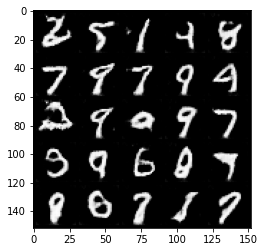

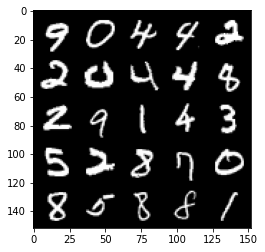

Loss Generator: 0.8257 / Loss Discriminator 0.6789: 100%|██████████| 469/469 [00:15<00:00, 31.22it/s]
Loss Generator: 0.9028 / Loss Discriminator 0.6075:   9%|▉         | 44/469 [00:01<00:12, 35.05it/s]

Epochs : 66 , steps : 31000


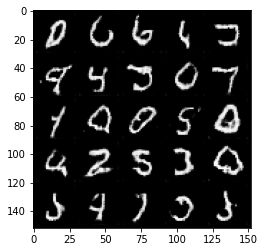

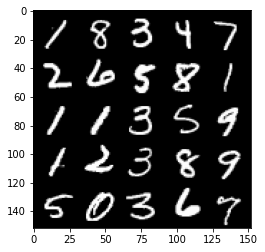

Loss Generator: 0.8785 / Loss Discriminator 0.6617: 100%|██████████| 469/469 [00:14<00:00, 33.17it/s]
Loss Generator: 0.8053 / Loss Discriminator 0.7069:  16%|█▌        | 76/469 [00:02<00:11, 34.29it/s]

Epochs : 67 , steps : 31500


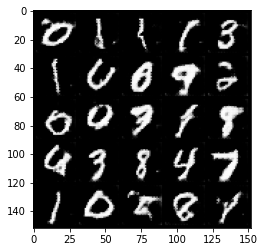

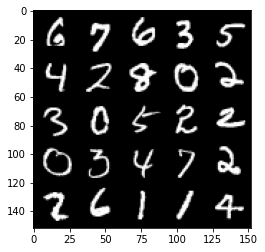

Loss Generator: 0.8548 / Loss Discriminator 0.6719: 100%|██████████| 469/469 [00:14<00:00, 32.48it/s]
Loss Generator: 0.8802 / Loss Discriminator 0.6406:  23%|██▎       | 107/469 [00:03<00:11, 31.29it/s]

Epochs : 68 , steps : 32000


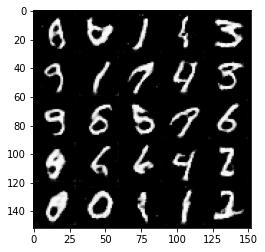

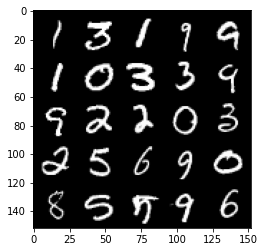

Loss Generator: 0.8649 / Loss Discriminator 0.6688: 100%|██████████| 469/469 [00:14<00:00, 32.87it/s]
Loss Generator: 0.9824 / Loss Discriminator 0.6208:  29%|██▉       | 136/469 [00:04<00:10, 33.16it/s]

Epochs : 69 , steps : 32500


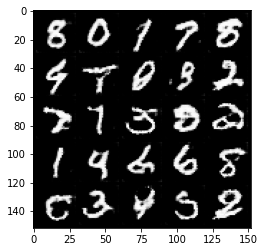

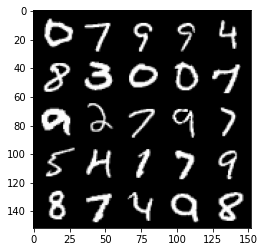

Loss Generator: 0.8794 / Loss Discriminator 0.6684: 100%|██████████| 469/469 [00:14<00:00, 33.14it/s]
Loss Generator: 0.8216 / Loss Discriminator 0.6938:  36%|███▌      | 168/469 [00:05<00:08, 34.12it/s]

Epochs : 70 , steps : 33000


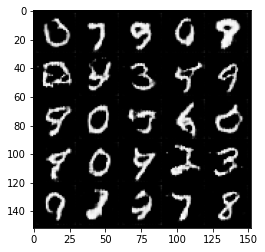

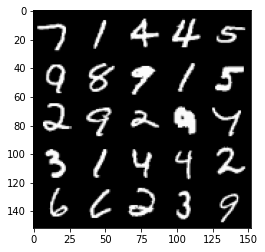

Loss Generator: 0.8207 / Loss Discriminator 0.682: 100%|██████████| 469/469 [00:14<00:00, 32.90it/s]
Loss Generator: 0.7541 / Loss Discriminator 0.7001:  42%|████▏     | 197/469 [00:06<00:08, 33.73it/s]

Epochs : 71 , steps : 33500


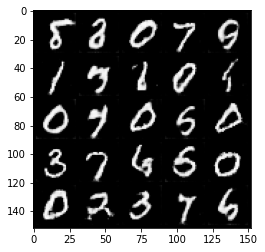

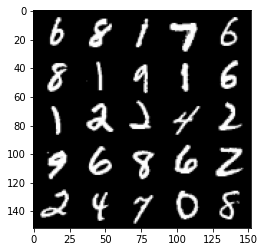

Loss Generator: 0.7624 / Loss Discriminator 0.6934: 100%|██████████| 469/469 [00:14<00:00, 32.20it/s]
Loss Generator: 0.7789 / Loss Discriminator 0.6783:  49%|████▉     | 229/469 [00:07<00:07, 34.13it/s]

Epochs : 72 , steps : 34000


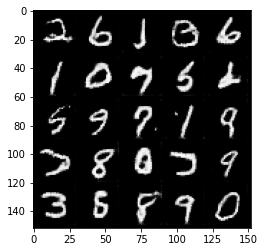

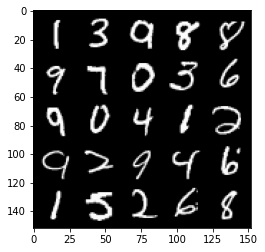

Loss Generator: 0.7748 / Loss Discriminator 0.6828: 100%|██████████| 469/469 [00:14<00:00, 32.83it/s]
Loss Generator: 0.7732 / Loss Discriminator 0.6869:  56%|█████▌    | 261/469 [00:07<00:05, 35.56it/s]

Epochs : 73 , steps : 34500


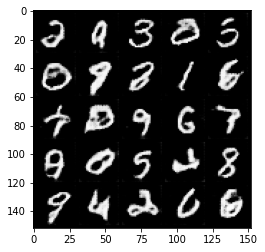

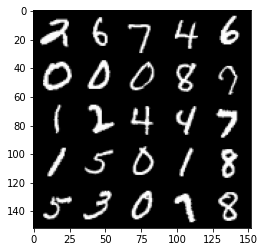

Loss Generator: 0.7802 / Loss Discriminator 0.6851: 100%|██████████| 469/469 [00:14<00:00, 33.00it/s]
Loss Generator: 0.9912 / Loss Discriminator 0.6297:  62%|██████▏   | 292/469 [00:08<00:05, 35.25it/s]

Epochs : 74 , steps : 35000


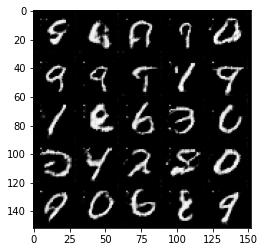

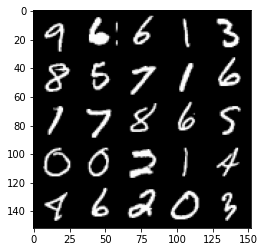

Loss Generator: 0.9569 / Loss Discriminator 0.6486: 100%|██████████| 469/469 [00:14<00:00, 33.40it/s]
Loss Generator: 0.8261 / Loss Discriminator 0.6654:  69%|██████▉   | 324/469 [00:09<00:04, 32.80it/s]

Epochs : 75 , steps : 35500


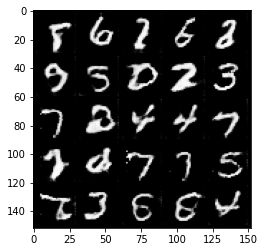

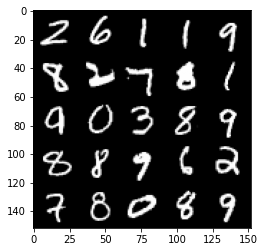

Loss Generator: 0.8091 / Loss Discriminator 0.6748: 100%|██████████| 469/469 [00:14<00:00, 33.43it/s]
Loss Generator: 0.7768 / Loss Discriminator 0.6812:  75%|███████▌  | 354/469 [00:10<00:03, 29.66it/s]

Epochs : 76 , steps : 36000


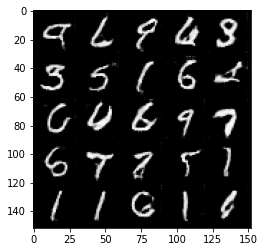

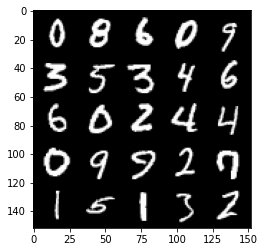

Loss Generator: 0.78 / Loss Discriminator 0.682: 100%|██████████| 469/469 [00:14<00:00, 31.87it/s]
Loss Generator: 0.8456 / Loss Discriminator 0.6691:  82%|████████▏ | 386/469 [00:11<00:02, 34.31it/s]

Epochs : 77 , steps : 36500


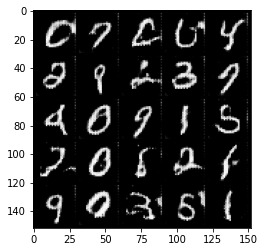

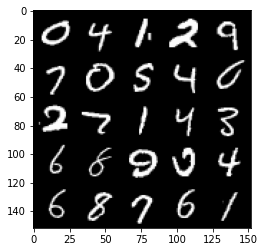

Loss Generator: 0.8535 / Loss Discriminator 0.663: 100%|██████████| 469/469 [00:14<00:00, 32.33it/s]
Loss Generator: 0.8129 / Loss Discriminator 0.6883:  89%|████████▊ | 416/469 [00:12<00:01, 34.26it/s]

Epochs : 78 , steps : 37000


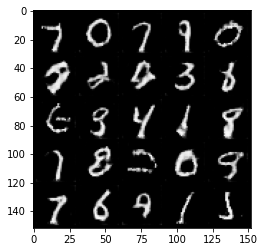

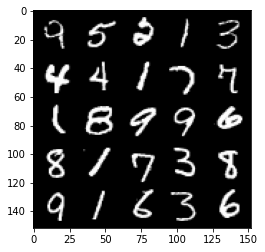

Loss Generator: 0.813 / Loss Discriminator 0.6842: 100%|██████████| 469/469 [00:14<00:00, 33.39it/s]
Loss Generator: 0.777 / Loss Discriminator 0.6896:  96%|█████████▌| 448/469 [00:13<00:00, 34.03it/s]

Epochs : 79 , steps : 37500


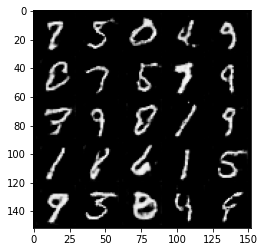

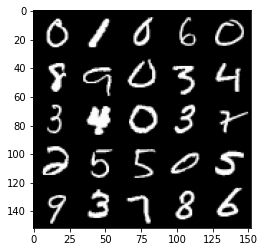

Loss Generator: 0.7771 / Loss Discriminator 0.689: 100%|██████████| 469/469 [00:14<00:00, 33.07it/s]
Loss Generator: 0.7849 / Loss Discriminator 0.684: 100%|██████████| 469/469 [00:13<00:00, 34.31it/s]
Loss Generator: 0.739 / Loss Discriminator 0.7249:   1%|▏         | 7/469 [00:00<00:15, 30.00it/s]

Epochs : 81 , steps : 38000


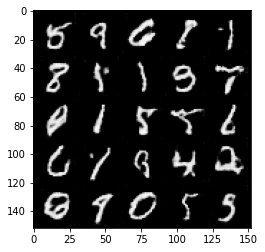

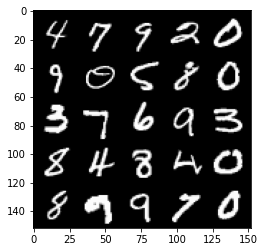

Loss Generator: 0.7761 / Loss Discriminator 0.6861: 100%|██████████| 469/469 [00:14<00:00, 33.43it/s]
Loss Generator: 0.7887 / Loss Discriminator 0.6826:   9%|▊         | 40/469 [00:01<00:12, 34.35it/s]

Epochs : 82 , steps : 38500


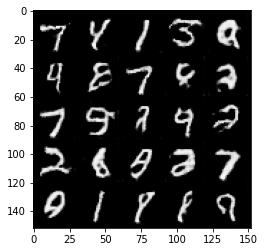

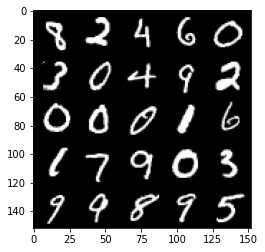

Loss Generator: 0.7658 / Loss Discriminator 0.6823: 100%|██████████| 469/469 [00:14<00:00, 32.87it/s]
Loss Generator: 0.7831 / Loss Discriminator 0.6647:  15%|█▌        | 72/469 [00:02<00:11, 35.43it/s]

Epochs : 83 , steps : 39000


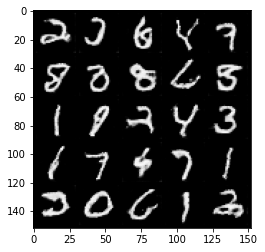

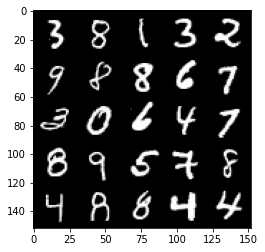

Loss Generator: 0.7708 / Loss Discriminator 0.6822: 100%|██████████| 469/469 [00:13<00:00, 33.66it/s]
Loss Generator: 0.7672 / Loss Discriminator 0.6741:  22%|██▏       | 103/469 [00:03<00:11, 33.11it/s]

Epochs : 84 , steps : 39500


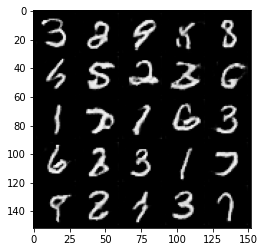

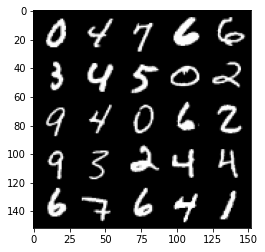

Loss Generator: 0.7675 / Loss Discriminator 0.6794: 100%|██████████| 469/469 [00:14<00:00, 33.13it/s]
Loss Generator: 0.7949 / Loss Discriminator 0.6782:  28%|██▊       | 131/469 [00:04<00:11, 30.27it/s]

Epochs : 85 , steps : 40000


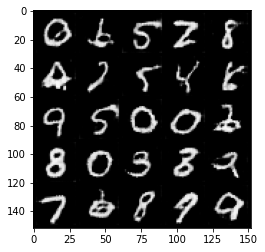

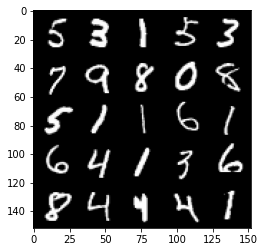

Loss Generator: 0.8229 / Loss Discriminator 0.6765: 100%|██████████| 469/469 [00:14<00:00, 31.76it/s]
Loss Generator: 0.7827 / Loss Discriminator 0.6954:  35%|███▍      | 164/469 [00:04<00:09, 32.86it/s]

Epochs : 86 , steps : 40500


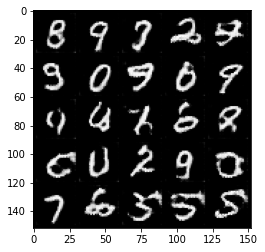

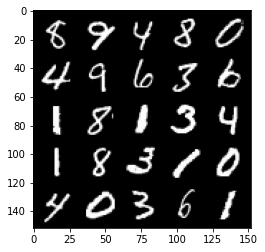

Loss Generator: 0.7748 / Loss Discriminator 0.6866: 100%|██████████| 469/469 [00:14<00:00, 32.02it/s]
Loss Generator: 0.7801 / Loss Discriminator 0.6939:  42%|████▏     | 196/469 [00:05<00:08, 33.60it/s]

Epochs : 87 , steps : 41000


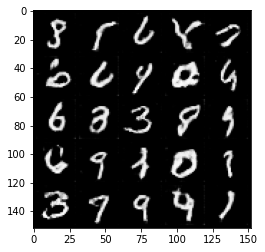

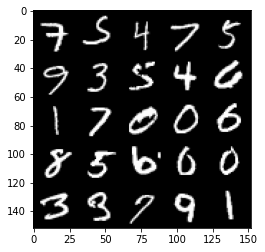

Loss Generator: 0.7628 / Loss Discriminator 0.6892: 100%|██████████| 469/469 [00:14<00:00, 33.12it/s]
Loss Generator: 0.746 / Loss Discriminator 0.6885:  48%|████▊     | 224/469 [00:06<00:07, 34.39it/s]

Epochs : 88 , steps : 41500


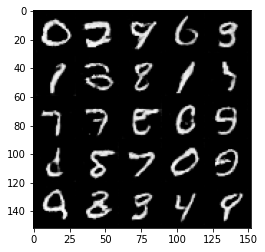

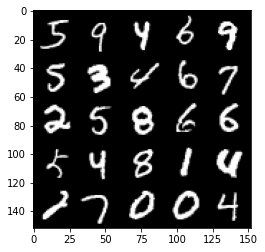

Loss Generator: 0.7528 / Loss Discriminator 0.6896: 100%|██████████| 469/469 [00:14<00:00, 32.84it/s]
Loss Generator: 0.7369 / Loss Discriminator 0.6881:  54%|█████▍    | 255/469 [00:07<00:06, 31.44it/s]

Epochs : 89 , steps : 42000


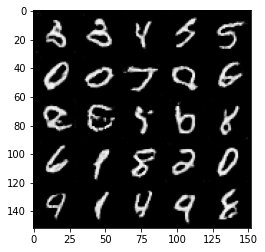

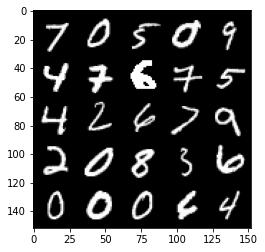

Loss Generator: 0.7467 / Loss Discriminator 0.6837: 100%|██████████| 469/469 [00:14<00:00, 32.48it/s]
Loss Generator: 0.7498 / Loss Discriminator 0.6899:  61%|██████    | 287/469 [00:08<00:05, 32.39it/s]

Epochs : 90 , steps : 42500


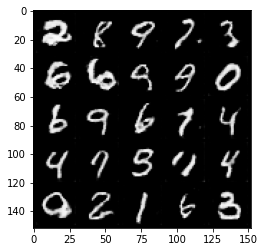

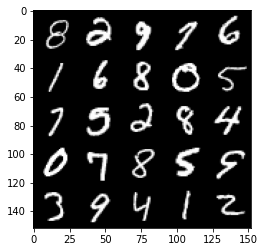

Loss Generator: 0.7519 / Loss Discriminator 0.6874: 100%|██████████| 469/469 [00:14<00:00, 32.88it/s]
Loss Generator: 0.7486 / Loss Discriminator 0.6881:  68%|██████▊   | 319/469 [00:09<00:04, 33.65it/s]

Epochs : 91 , steps : 43000


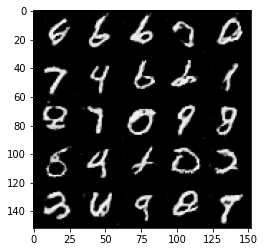

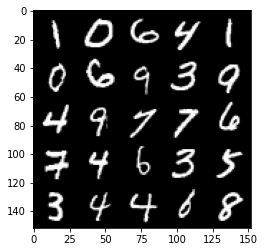

Loss Generator: 0.7542 / Loss Discriminator 0.6879: 100%|██████████| 469/469 [00:14<00:00, 33.11it/s]
Loss Generator: 0.7888 / Loss Discriminator 0.678:  75%|███████▍  | 350/469 [00:10<00:03, 34.25it/s]

Epochs : 92 , steps : 43500


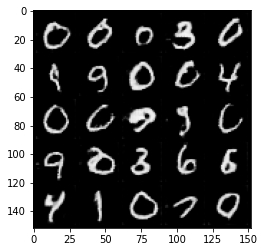

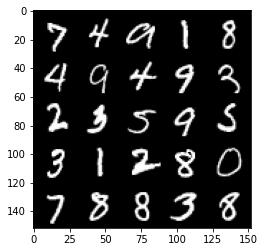

Loss Generator: 0.7832 / Loss Discriminator 0.6789: 100%|██████████| 469/469 [00:14<00:00, 32.76it/s]
Loss Generator: 0.7452 / Loss Discriminator 0.6917:  81%|████████  | 381/469 [00:11<00:02, 33.42it/s]

Epochs : 93 , steps : 44000


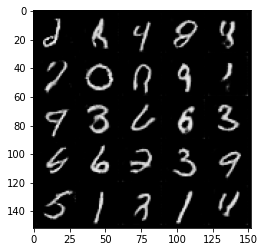

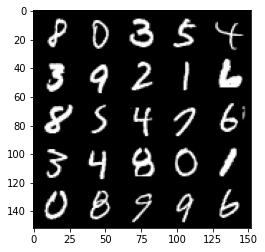

Loss Generator: 0.7459 / Loss Discriminator 0.6906: 100%|██████████| 469/469 [00:14<00:00, 32.46it/s]
Loss Generator: 0.7545 / Loss Discriminator 0.683:  88%|████████▊ | 411/469 [00:12<00:01, 31.75it/s]

Epochs : 94 , steps : 44500


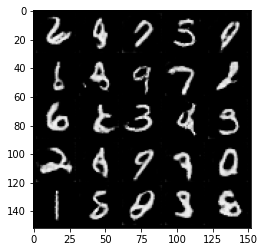

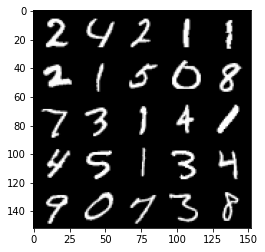

Loss Generator: 0.7487 / Loss Discriminator 0.6874: 100%|██████████| 469/469 [00:14<00:00, 32.62it/s]
Loss Generator: 0.7574 / Loss Discriminator 0.6876:  94%|█████████▍| 442/469 [00:13<00:00, 33.82it/s]

Epochs : 95 , steps : 45000


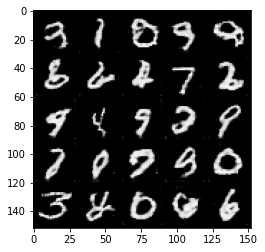

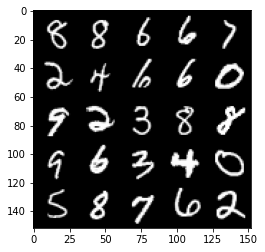

Loss Generator: 0.7584 / Loss Discriminator 0.6864: 100%|██████████| 469/469 [00:14<00:00, 32.80it/s]
Loss Generator: 0.7474 / Loss Discriminator 0.6861: 100%|██████████| 469/469 [00:14<00:00, 32.40it/s]
Loss Generator: 0.6979 / Loss Discriminator 0.7364:   1%|          | 4/469 [00:00<00:14, 32.26it/s]

Epochs : 97 , steps : 45500


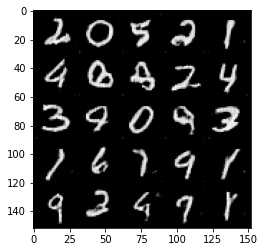

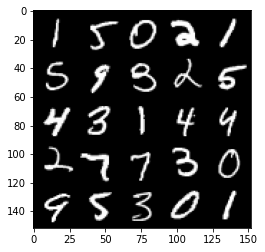

Loss Generator: 0.7468 / Loss Discriminator 0.687: 100%|██████████| 469/469 [00:14<00:00, 32.57it/s]
Loss Generator: 0.7625 / Loss Discriminator 0.6723:   8%|▊         | 36/469 [00:01<00:12, 34.31it/s]

Epochs : 98 , steps : 46000


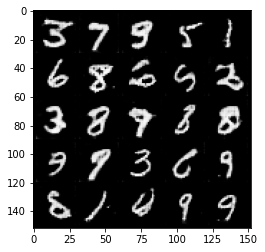

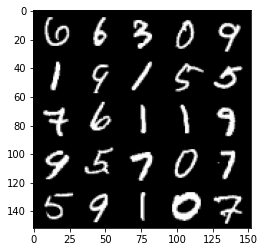

Loss Generator: 0.7385 / Loss Discriminator 0.6883: 100%|██████████| 469/469 [00:14<00:00, 32.28it/s]
Loss Generator: 0.7523 / Loss Discriminator 0.6728:  14%|█▍        | 67/469 [00:02<00:12, 33.14it/s]

Epochs : 99 , steps : 46500


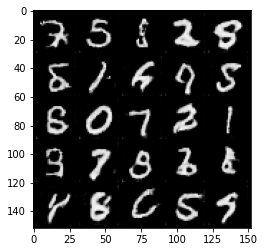

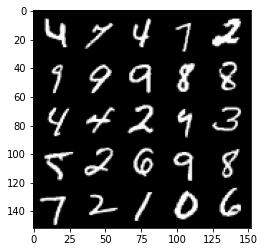

Loss Generator: 0.7379 / Loss Discriminator 0.6856: 100%|██████████| 469/469 [00:14<00:00, 32.98it/s]


In [8]:
history_gen = []
history_disc = []
curr_step = 0
for epoch in range(n_epochs):
    total_gen = 0.
    total_disc = 0.
    t = tqdm(dataloader)
    for idx, (real_img, labels) in enumerate(t):
        curr_step += 1
        # generate fake image
        random_noise = generate_noise_vector(batch_size, z_dim, device)
        fake_img = gen(random_noise)
        
        ## -- update discriminator -- ## 
        disc_optimizer.zero_grad()
        
        # predict real image with discriminator
        real_img = real_img.to(device)
        preds_real = disc(real_img)
        real_img = real_img.to("cpu")
        
        # predict fake image with discriminator
        preds_fake = disc(fake_img.detach())
        
        # compute loss function for discriminator
        loss_discriminator_fake = criterion(preds_fake, torch.zeros(preds_fake.shape, device=preds_fake.device))
        loss_discriminator_real = criterion(preds_real, torch.ones(preds_real.shape, device=preds_real.device))
        loss_disc = (loss_discriminator_fake + loss_discriminator_real)/2.0
        loss_disc.backward()
        disc_optimizer.step()
        total_disc += loss_disc.item()
        
        
        ## -- update generator -- ##
        gen_optimizer.zero_grad()
        
        # predict fake image without detaching for gradient
        preds_fake = disc(fake_img)
        
        # compute loss for generator
        # The idea is to fool the discriminator so image fake should be considered as true
        
        loss_generator = criterion(preds_fake, torch.ones(preds_fake.shape, device=preds_fake.device))
        loss_generator.backward()
        gen_optimizer.step()
        total_gen += loss_generator.item()
        t.set_description("Loss Generator: {0} / Loss Discriminator {1}".format( round(total_gen/(idx+1),4), round(total_disc/(idx+1), 4)))
        t.refresh()
        
        
        if curr_step % display_step == 0 and curr_step > 0:
            print(f"Epochs : {epoch} , steps : {curr_step}")
            show_tensor_images(fake_img)
            show_tensor_images(real_img)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
            
    history_gen.append(total_gen/(idx+1))
    history_disc.append(total_disc/(idx+1))

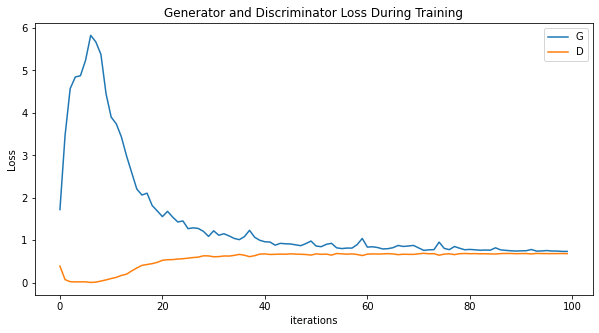

In [9]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(history_gen,label="G")
plt.plot(history_disc,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

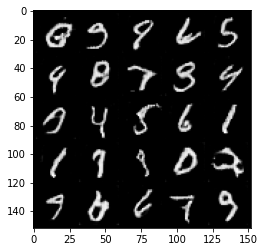

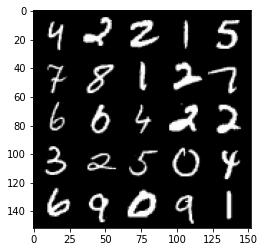

In [10]:
show_tensor_images(fake_img)
show_tensor_images(real_img)